# py50 Quickstart
The following details how to get up and running using py50. These funcitons take in simple parameters to plot the dose-response curves. There are three plotting options - Single Curve, Multi Curve, and Grid Plot. 

In [1]:
import pandas as pd
from py50.calculator import Calculator
from py50.plotcurve import PlotCurve
from py50.plot_settings import CBMARKERS, CBPALETTE

## Calculate Relative and Absolute IC50

In [2]:
# Read in dataset
example = pd.read_csv('../dataset/single_example.csv')

calc_data = Calculator(example) # Instantiate dataframe into the Calculator class 
calc_data.show().head()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92
1,Drug 1,33300.0,97,89,93
2,Drug 1,11100.0,86,89,88
3,Drug 1,3700.0,81,88,84
4,Drug 1,1240.0,63,70,67


In [3]:
# Perform calculation
# If only relative IC50 needed, can use the calc_data.calculate_ic50() function instead.
calculation = calc_data.calculate_absolute_ic50(name_col='Compound Name', concentration_col='Compound Conc', response_col='% Inhibition Avg')
calculation

,compound_name,maximum,minimum,relative ic50 (nM),absolute ic50 (nM),hill_slope
0,Drug 1,92.854428,-7.640263,439.823988,584.734114,1.040875


If IC50 is not your cup of tea, you can quickly scale the values into pIC50 values. This is done using the calculate_pic50() function. It will calculate absolute IC50, but will append two additional columns for hte relative pIC50 and absolute pIC50.

In [4]:
calculation = calc_data.calculate_pic50(name_col='Compound Name', concentration_col='Compound Conc', response_col='% Inhibition Avg')
calculation

,compound_name,maximum,minimum,relative ic50 (nM),absolute ic50 (nM),hill_slope,relative pIC50,absolute pIC50
0,Drug 1,92.854428,-7.640263,439.823988,584.734114,1.040875,6.356721,6.233042


## Single Curve

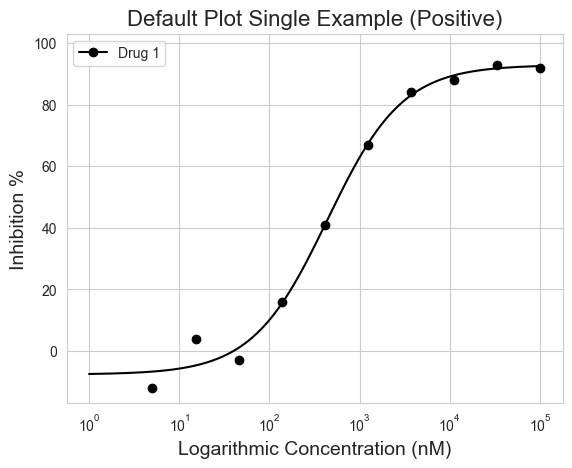

In [5]:
single = pd.read_csv('../dataset/single_example.csv')
plot_data = PlotCurve(single)
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Default Plot Single Example (Positive)',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (nM)',
                                     ylabel='Inhibition %',
                                     legend=True)

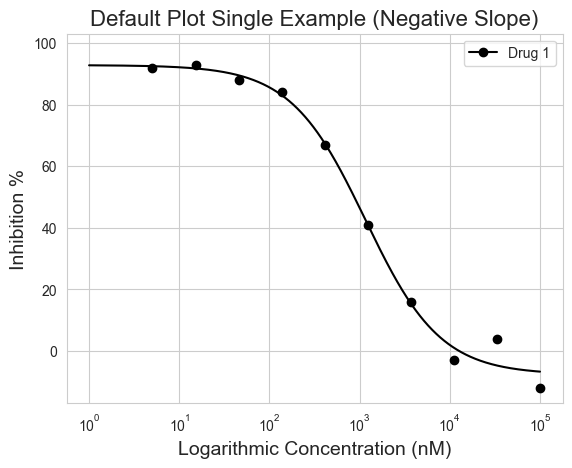

In [6]:
single_negative = pd.read_csv('../dataset/single_example_negative.csv')
plot_data = PlotCurve(single_negative)
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Default Plot Single Example (Negative Slope)',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (nM)',
                                     ylabel='Inhibition %',
                                     legend=True)

## Multi-Curve

In [7]:
# Read in Dataset
multi = pd.read_csv('../dataset/multiple_example.csv')

# Instantiate dataframe into the PlotCurve class 
plot_data = PlotCurve(multi)

# Optional to inspect table
# plot_data.show()

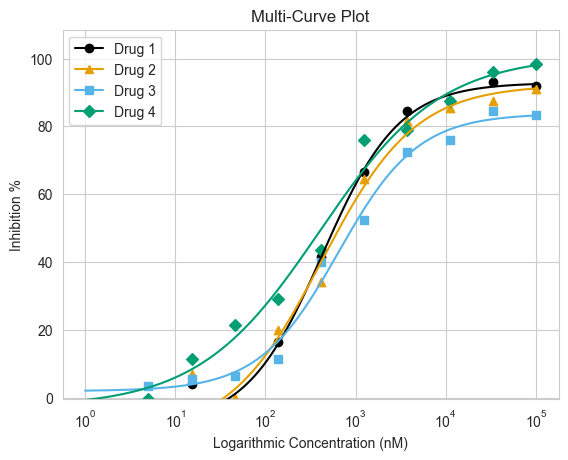

In [8]:
figure = plot_data.multi_curve_plot(name_col='Compound Name',
                                    concentration_col='Compound Conc',
                                    response_col='% Inhibition Avg',
                                    plot_title='Multi-Curve Plot',
                                    xlabel='Logarithmic Concentration (nM)',
                                    ylabel='Inhibition %',
                                    legend=True,
                                    line_color=CBPALETTE,
                                    marker=CBMARKERS)

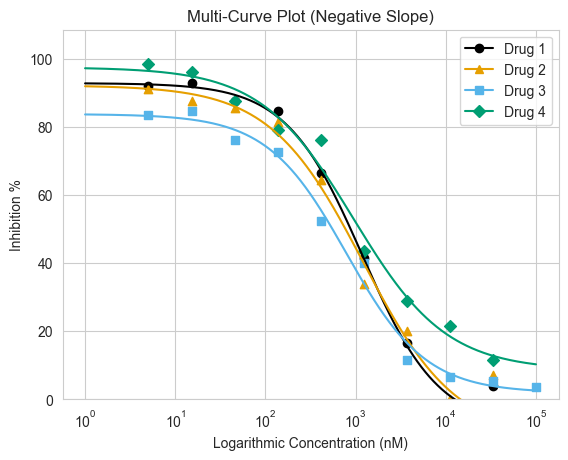

In [9]:
# For negative slope
# Read in Dataset
multi = pd.read_csv('../dataset/multiple_example_negative.csv')

# Instantiate dataframe into the PlotCurve class 
plot_data = PlotCurve(multi)

figure = plot_data.multi_curve_plot(name_col='Compound Name',
                                    concentration_col='Compound Conc',
                                    response_col='% Inhibition Avg',
                                    plot_title='Multi-Curve Plot (Negative Slope)',
                                    xlabel='Logarithmic Concentration (nM)',
                                    ylabel='Inhibition %',
                                    legend=True,
                                    line_color=CBPALETTE,
                                    marker=CBMARKERS)

## Grid Plot

In [10]:
# Read in Dataset
grid = pd.read_csv('../dataset/multiple_example.csv')

# Instantiate dataframe into the PlotCurve class 
grid_plot = PlotCurve(grid)

# Optional to inspect table
grid_plot.show()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92.0
1,Drug 1,33300.0,97,89,93.0
2,Drug 1,11100.0,86,89,87.5
3,Drug 1,3700.0,81,88,84.5
4,Drug 1,1240.0,63,70,66.5
5,Drug 1,412.0,36,47,41.5
6,Drug 1,137.0,22,11,16.5
7,Drug 1,45.7,-4,-3,-3.5
8,Drug 1,15.2,11,-3,4.0
9,Drug 1,5.0,-14,-11,-12.5


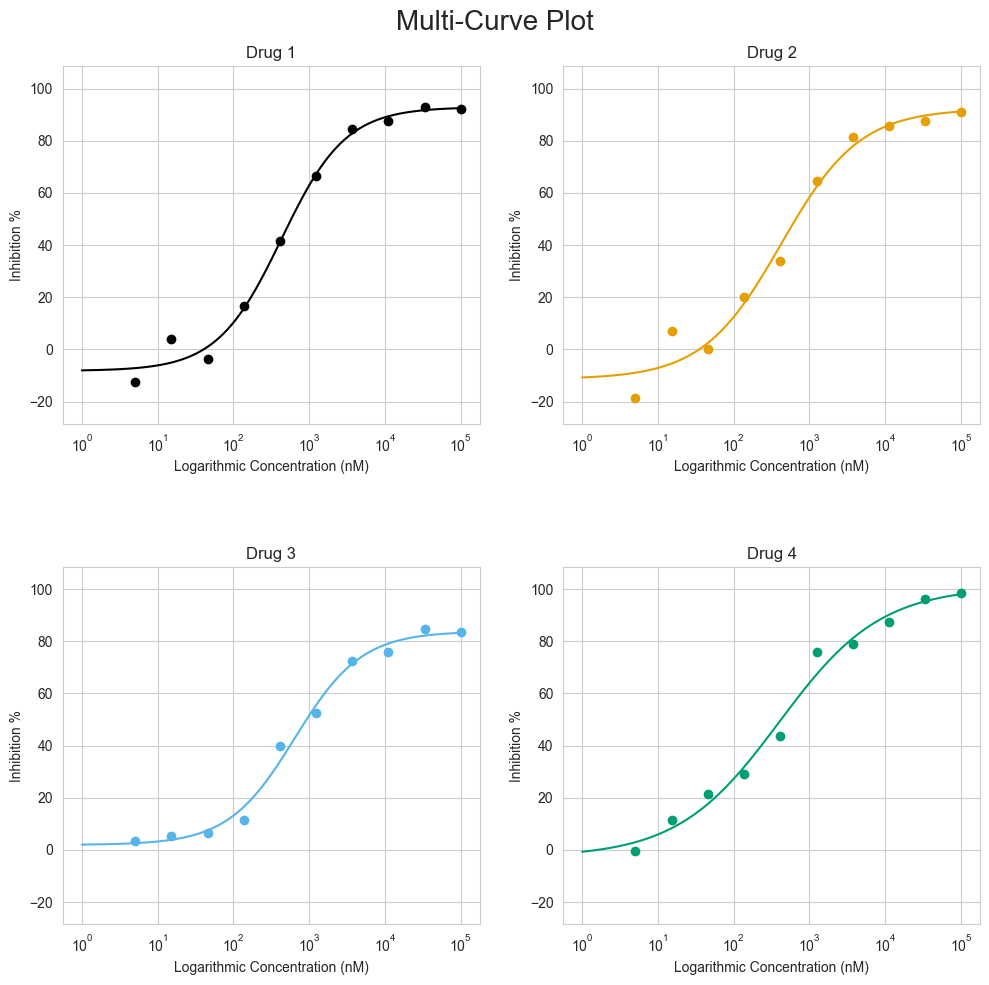

In [11]:
figure = grid_plot.grid_curve_plot(name_col='Compound Name',
                                   concentration_col='Compound Conc',
                                   response_col='% Inhibition Avg',
                                   plot_title='Multi-Curve Plot',
                                   xlabel=('Logarithmic Concentration (nM)'),
                                   ylabel='Inhibition %',
                                   conc_unit='nM',
                                   figsize=(10,10))